# Project 1: End-to-End Pipeline to Classify News Articles

## Question 1

### 1.1 Overview How many rows (samples) and columns (features) are present in the dataset?

In [1]:
import pandas as pd

df = pd.read_csv('Project1-ClassificationDataset.csv')

num_rows, num_cols = df.shape

print(f"Number of rows (samples): {num_rows}")
print(f"Number of cols (features): {num_cols}")

Number of rows (samples): 3476
Number of cols (features): 8


### 1.2 Histograms

#### (a) The total number of alpha-numeric characters per data point (row) in the feature full text: i.e count on the x-axis and frequency on the y-axis

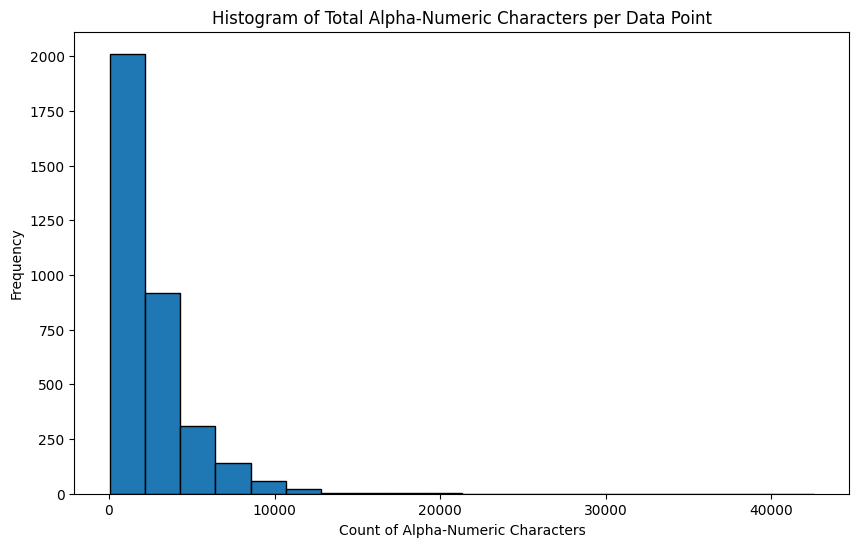

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'Project1-ClassificationDataset.csv'
df = pd.read_csv(file_path)

# (a) Histogram for the total number of alpha-numeric characters per data point
df['Total_AlphaNumeric_Count'] = df['full_text'].apply(lambda x: sum(c.isalnum() for c in str(x)))
plt.figure(figsize=(10, 6))
plt.hist(df['Total_AlphaNumeric_Count'], bins=20, edgecolor='black')
plt.title('Histogram of Total Alpha-Numeric Characters per Data Point')
plt.xlabel('Count of Alpha-Numeric Characters')
plt.ylabel('Frequency')
plt.show()

#### (b) The column leaf label – class on the x-axis

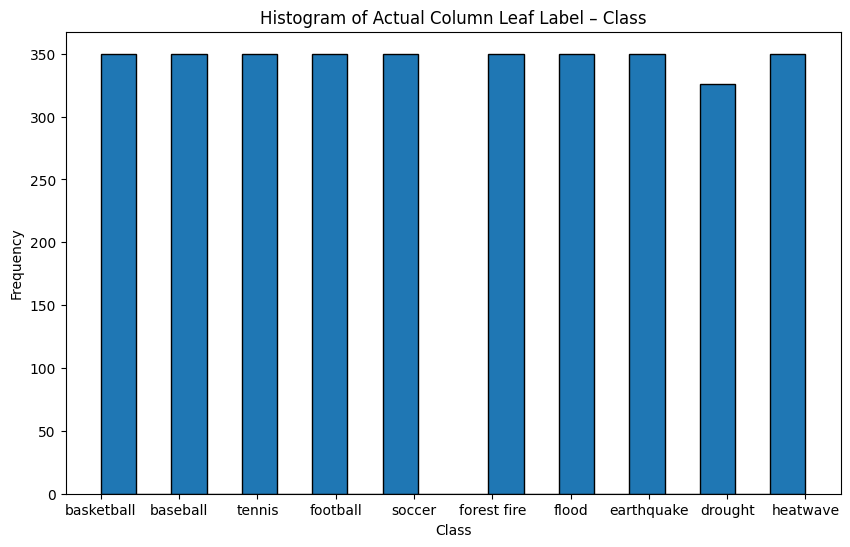

In [3]:
# (b) Histogram for the actual column leaf label – class
leaf_label_column = 'leaf_label'  
plt.figure(figsize=(10, 6))
plt.hist(df[leaf_label_column], bins=20, edgecolor='black')
plt.title('Histogram of Actual Column Leaf Label – Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


#### (c) The column root label – class on the x-axis.

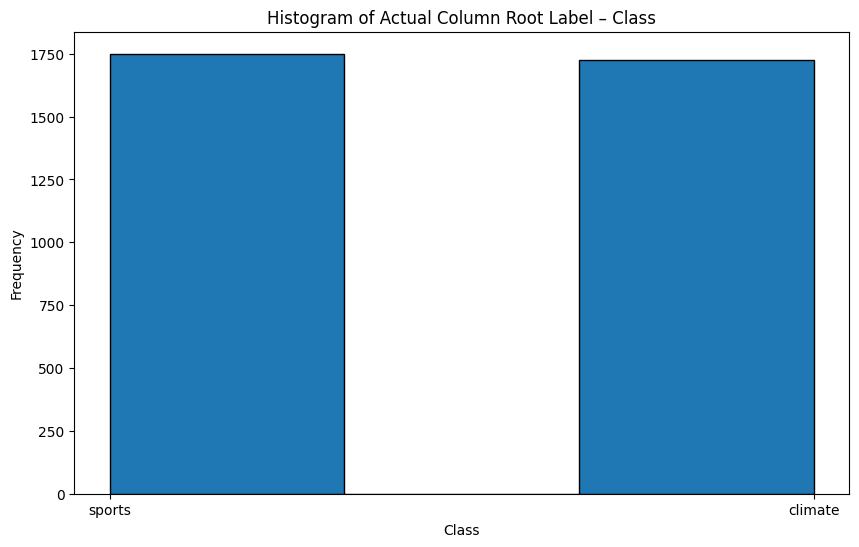

In [4]:
# (c) Histogram for the actual column root label – class
root_label_column = 'root_label'  
plt.figure(figsize=(10, 6))
plt.hist(df[root_label_column], bins=3, edgecolor='black')
plt.title('Histogram of Actual Column Root Label – Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 1.3 Interpret Plots: Provide qualitative interpretations of the histograms.

** incomplete **

(a) Histogram of Alpha Numeric Characters per Data Point
- Histogram reveals the distribution of the total number of alpha-numeric characters in the 'full_text' feature for each data point

(b) Histogram of Leaf Label Class
- b

(c) Histogram of Root Label Class
- c

## Question 2

In [5]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

### Report the number of training and testing samples.

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size=0.2)

num_training_samples = len(train)
num_testing_samples = len(test)

print(f"Number of training samples: {num_training_samples}")
print(f"Number of testing samples: {num_testing_samples}")

Number of training samples: 2780
Number of testing samples: 696


## Question 3


### 3.1 Cleaning each data sample. This function helps remove many but not all HTML artefacts from the crawler’s output. 

In [7]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

Call the clean(text) function to clean the crawler's output and remove most HTML artefacts 

In [8]:
train['full_text'] = train['full_text'].map(clean)
test['full_text'] = test['full_text'].map(clean)

### 3.2 Create the CountVectorizer with "english" stopword

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(min_df=3, stop_words="english")

### 3.3, 3.4, 3.5 Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos tag and Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.) using min_df=3

In [55]:
# Lemmatization
import nltk
from nltk import pos_tag

# nltk.download()
wnl = nltk.wordnet.WordNetLemmatizer()

# Penn Trebank to wordnet 
# In the wordnet (ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v', POS_LIST = [NOUN, VERB, ADJ, ADV])
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

# Lemmatize entire data (data made up of sentences. Lemmatize ever word in every sentence and return the lemmatized data)
def lemmatize(data):
    lemmatized_data = [] 
    for text in data:
        # print("text": text)
        # Return a tokenized copy of text 
        tokens = nltk.word_tokenize(text)
        # print(tokens)
        
        # tags given list of tokens 
        tagged = pos_tag(tokens)
        # print(tagged)

        # lemmatize text excluding numbers 
        lemmatized_words = []
        for word, tag in tagged:
            # print("word: " word)
            if not re.match(r'^\d+(\.\d+)?$', word): # double check this
                lemmatized_word = wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
                lemmatized_words.append(lemmatized_word)
            
        lemmatized_sentence = ' '.join(lemmatized_words)
        
        # Add whole sentence back to the lemmatize_data array 
        lemmatized_data.append(lemmatized_sentence)

    return lemmatized_data

In [56]:
# Lemmatize train and test datasets 
train_lemmatized = lemmatize(train['full_text'])
test_lemmatized = lemmatize(test['full_text'])

In [57]:
# Vectorize the lemmatized train and test datasets 
X_train_counts = count_vect.fit_transform(train_lemmatized)
X_test_counts = count_vect.transform(test_lemmatized)

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer
# TF-IDF 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

### 3.6 Answer Questions 

What are the pros and cons of lemmatization versus stemming? How do these processes affect the dictionary size?
- incomplete 

min df means minimum document frequency. How does varying min df change the TF-IDF matrix?
- incomplete 

Should I remove stopwords before or after lemmatizing? Should I remove punctuations before or after lemmatizing? Should I remove numbers before or after lemmatizing? Hint: Recall that the full sentence is input into the Lemmatizer and the lemmatizer is tagging the position of every word based on the sentence structure.
- incomplete 

Report the shape of the TF-IDF-processed train and test matrices. The number of rows should match the results of Question 2. The number of columns should roughly be in the order of k×103. This dimension will vary depending on your exact method of cleaning and lemmatizing and that is okay.
- incomplete 

## Question 4

In [ ]:
# LSI
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

lsi = TruncatedSVD(n_components=50, random_state=0)
X_train_lsi = lsi.fit_transform(X_train_tfidf)
X_test_lsi = lsi.transform(X_test_tfidf)

# NOT VALIDATED
USigmaVt = lsi.inverse_transform(X_train_lsi)
LSI_frobenius = np.sum(np.array(X_train_tfidf - USigmaVt)**2)
print("Squared Frobenius Norm for LSI: " + str(LSI_frobenius))


In [ ]:
# NMF
from sklearn.decomposition import NMF
from sklearn.svm import LinearSVC

nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)

# NOT VALIDATED
WH = np.dot(X_train_NMF, nmf.components_)
NMF_frobenius = np.sum(np.array(X_train_tfidf - WH)**2)
print("Squared Frobenius Norm for NMF: " + str(NMF_frobenius))

### 4.1.1 Plot the explained variance ratio.

In [ ]:
# NOT VALIDATED
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Vectorize the text data
vectorizer = CountVectorizer(min_df=3, stop_words="english")
X = vectorizer.fit_transform(corpus)

# Define values of k
k_values = [1, 10, 50, 100, 200, 500, 1000, 2000]

# Plot explained variance ratio for different values of k
explained_variances = []

for k in k_values:
    svd = TruncatedSVD(n_components=k)
    lsi = make_pipeline(svd, Normalizer(copy=False))
    lsi.fit_transform(X)
    explained_variances.append(svd.explained_variance_ratio_.sum())

plt.plot(k_values, explained_variances, marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components (LSI)')
plt.show()

### 4.1.2 What does the explained variance ratio plot look like? 

### 4.1.3 What does the plot’s concavity suggest?
incomplete 

### 4.2.1 Calculate the reconstruction residual MSE error. 

### 4.2.2 Which one is larger, NMF or LSI and why? 
incomplete 